# Research Questions
What countries had the highest/lowest vaccination rates?
Covid cases vs vaccinations?

In [31]:
import pandas as pd
from pathlib import Path
import numpy as np

In [32]:
age_group = Path("../Resources/vaccinations-by-age-group.csv")
manufacturer = Path("../Resources/vaccinations-by-manufacturer.csv")

In [33]:
age_group_df = pd.read_csv(age_group)
manufacturer_df = pd.read_csv(manufacturer)
print(age_group_df["location"].nunique())
print(manufacturer_df["location"].nunique())

38
44


In [34]:
age_group_df

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.00,0.00,0.0
1,Argentina,2020-01-01,12-17,0.00,0.00,0.0
2,Argentina,2020-01-01,18-29,0.00,0.00,0.0
3,Argentina,2020-01-01,3-11,0.00,0.00,0.0
4,Argentina,2020-01-01,30-39,0.00,0.00,0.0
...,...,...,...,...,...,...
72535,Uruguay,2021-07-09,35-44,81.24,73.55,NaN
72536,Uruguay,2021-07-09,45-54,84.00,78.39,NaN
72537,Uruguay,2021-07-09,55-64,88.66,84.06,NaN
72538,Uruguay,2021-07-09,65-74,89.78,78.87,NaN


In [35]:
age_group_df = age_group_df.groupby(['location','age_group']).max(['people_vaccinated_per_hundred'])
age_group_df.head(20)

people_vaccinated_per_hundred  \
location  age_group                                  
Argentina 100+                              113.85   
          12-17                              92.05   
          18-29                              98.03   
          3-11                               84.76   
          30-39                             100.02   
          40-49                              99.45   
          50-59                              97.10   
          60-69                              99.71   
          70-79                              97.90   
          80-89                              93.22   
          90-99                              83.02   
Australia 12-15                              84.97   
          16-19                              93.77   
          20-29                              90.54   
          30-39                              96.56   
          40-49                              96.96   
          5-11                               46.40   
          50-59                              98.49   
          60-69                             101.56   
          70-79                             107.31   

                     people_fully_vaccinated_per_hundred  \
location  age_group                                        
Argentina 100+                                     92.01   
          12-17                                    65.22   
          18-29                                    83.78   
          3-11                                     68.01   
          30-39                                    90.03   
          40-49                                    90.64   
          50-59                                    79.87   
          60-69                                    77.02   
          70-79                                    83.98   
          80-89                                    86.48   
          90-99                                    76.66   
Australia 12-15                                    80.45   
          16-19                                    91.85   
          20-29                                    88.20   
          30-39                                    94.57   
          40-49                                    95.77   
          5-11                                      0.28   
          50-59                                    97.43   
          60-69                                   100.45   
          70-79                                   106.16   

                     people_with_booster_per_hundred  
location  age_group                                   
Argentina 100+                                129.01  
          12-17                                44.05  
          18-29                                56.13  
          3-11                                 15.06  
          30-39                                78.05  
          40-49                               100.17  
          50-59                               117.12  
          60-69                               145.27  
          70-79                               162.90  
          80-89                               141.16  
          90-99                               117.33  
Australia 12-15                                  NaN  
          16-19                                  NaN  
          20-29                                  NaN  
          30-39                                  NaN  
          40-49                                  NaN  
          5-11                                   NaN  
          50-59                                  NaN  
          60-69                                  NaN  
          70-79                                  NaN

# Manufacturer Data

In [36]:
manufacturer_df

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401
...,...,...,...,...
67939,European Union,2024-05-03,Sanofi/GSK,5458
67940,European Union,2024-05-03,Sinopharm/Beijing,2320667
67941,European Union,2024-05-03,Sinovac,10664
67942,European Union,2024-05-03,Sputnik V,1845408


In [55]:
manufacturer_df = manufacturer_df.groupby(['location']).sum('total_vaccinations')
manufacturer_df.head(50)

,total_vaccinations
location,
Argentina,70745181614
Austria,1860626688
Belgium,2717809583
Bulgaria,437428813
Canada,3722428506
Chile,15182285305
Croatia,569391016
Cyprus,151127464
Czechia,15751384786


In [56]:
total_vax = manufacturer_df.groupby(['location']).max(['total_vaccinations'])
total_vax = total_vax.drop(index = 'European Union')
print(total_vax)
total_vax.describe()

               total_vaccinations
location                         
Argentina             70745181614
Austria                1860626688
Belgium                2717809583
Bulgaria                437428813
Canada                 3722428506
Chile                 15182285305
Croatia                 569391016
Cyprus                  151127464
Czechia               15751384786
Denmark                1341347541
Ecuador                4460912722
Estonia                 221620865
Finland                1140800662
France                98712199387
Germany              104981008740
Hong Kong             13825815975
Hungary                1558303258
Iceland                   4372361
Ireland                1218346861
Italy                 99564293304
Japan                183523859069
Latvia                  855246184
Liechtenstein             4520716
Lithuania               454345989
Luxembourg              115391137
Malta                   117826463
Nepal                  4379771383
Netherlands   

,total_vaccinations
count,4.300000e+01
mean,2.318601e+10
std,4.759971e+10
min,4.372361e+06
25%,7.266441e+08
50%,2.882814e+09
75%,1.228585e+10
max,2.054336e+11


Text(0.5, 1.0, 'Total Vaccinations from January 2021 to April 2024')

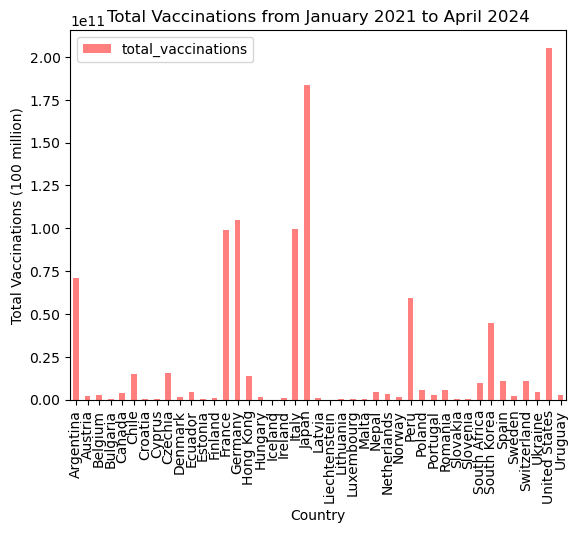

In [57]:
count_chart = total_vax.plot(kind='bar', color='red', alpha=0.5)
count_chart.set_xlabel('Country')
count_chart.set_ylabel('Total Vaccinations (100 million)')
count_chart.set_title('Total Vaccinations from January 2021 to April 2024')

In [52]:
top_ten_chart = total_vax.nlargest(columns = 'total_vaccinations', n = 10)
top_ten_chart

,total_vaccinations
location,
United States,205433575279
Japan,183523859069
Germany,104981008740
Italy,99564293304
France,98712199387
Argentina,70745181614
Peru,59292318930
South Korea,44863141037
Czechia,15751384786


Text(0.5, 1.0, 'Ten Countries with the Highest Total Vaccinations')

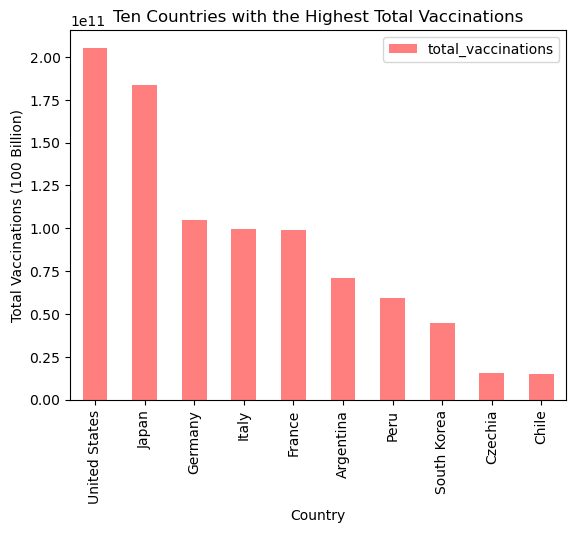

In [53]:
top_ten_chart = top_ten_chart.plot(kind = 'bar', alpha = 0.5, color = 'red')
top_ten_chart.set_xlabel('Country')
top_ten_chart.set_ylabel('Total Vaccinations (100 Billion)')
top_ten_chart.set_title('Ten Countries with the Highest Total Vaccinations')

In [49]:
bottom_ten_chart = total_vax.nsmallest(columns = 'total_vaccinations', n = 10)
bottom_ten_chart

,total_vaccinations
location,
Iceland,4372361
Liechtenstein,4520716
Luxembourg,115391137
Malta,117826463
Cyprus,151127464
Estonia,221620865
Slovenia,262823998
Bulgaria,437428813
Lithuania,454345989


Text(0, 0.5, 'Total Vaccinations (100 Million)')

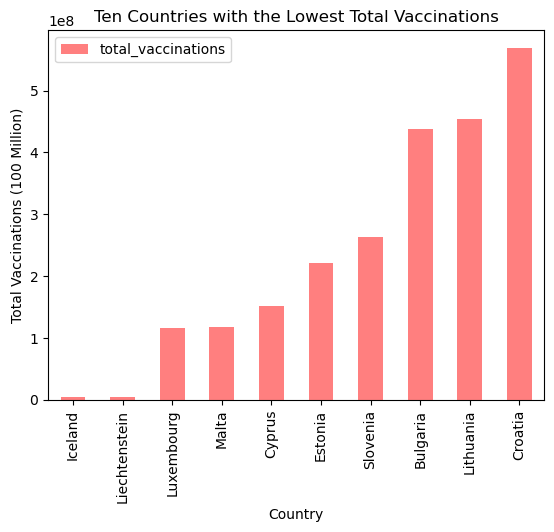

In [50]:
bottom_ten_chart = bottom_ten_chart.plot(kind='bar', alpha=0.5, color='red')
bottom_ten_chart.set_title('Ten Countries with the Lowest Total Vaccinations')
bottom_ten_chart.set_xlabel('Country')
bottom_ten_chart.set_ylabel('Total Vaccinations (100 Million)')